# Sample Models

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

RANDOM_SEED = 1

/Users/split/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv('airline_delays.csv')

In [3]:
df.columns

Index(['year', 'month', 'day_of_month', 'day_of_week', 'fl_date',
       'mkt_unique_carrier', 'origin_airport_id', 'dest_airport_id',
       'crs_dep_time', 'dep_time', 'dep_delay', 'dep_del15', 'taxi_out',
       'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'arr_del15',
       'crs_elapsed_time', 'actual_elapsed_time', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_ca', 'is_weekday', 'external_cause', 'TMAX', 'TMIN', 'TAVG',
       'PRCP', 'AWND', 'WSF2', 'WT01', 'WT08'],
      dtype='object')

In [35]:
x_cols = df.drop(columns=['fl_date', 'mkt_unique_carrier', 'origin_airport_id', 
                         'dest_airport_id', 'dep_time', 'arr_time', 'dep_del15',
                         'arr_del15', 'actual_elapsed_time', 'carrier_delay', 
                         'weather_delay', 'nas_delay', 'security_delay', 
                         'late_aircraft_delay', 'arr_delay']).columns

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    df[x_cols],
    df['arr_delay'],
    test_size=.5,
    random_state=1
)

## Linear Regression

In [37]:
lm = LinearRegression(fit_intercept=True)

In [38]:
lm.fit(X_train, y_train)

LinearRegression()

In [39]:
lm.score(X_test, y_test)

0.9255129425349434

In [40]:
mean_squared_error(y_test, lm.predict(X_test))

104.628207667078

In [41]:
pd.Series(lm.coef_, index=x_cols)

year              -0.892341
month             -0.006792
day_of_month       0.009404
day_of_week       -0.008862
crs_dep_time       0.002071
dep_delay          0.929796
taxi_out           0.771554
taxi_in            0.550579
crs_arr_time      -0.001932
distance          -0.004416
origin_ca         -1.759421
is_weekday         0.129363
external_cause    11.052767
TMAX              -0.173274
TMIN               0.099993
TAVG               0.148221
PRCP              11.344728
AWND               0.047110
WSF2              -0.018448
WT01              -0.075304
WT08               0.139132
dtype: float64

## Ridge Regression

In [42]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [43]:
ridge = Ridge(fit_intercept=True, random_state=RANDOM_SEED)

In [44]:
ridge.fit(X_train, y_train)

Ridge()

In [45]:
ridge.score(X_test, y_test)

0.925512997655849

In [46]:
mean_squared_error(y_test, ridge.predict(X_test))

104.62813024152571

In [47]:
pd.Series(ridge.coef_, index=x_cols)

year              -0.889066
month             -0.007279
day_of_month       0.009586
day_of_week       -0.008890
crs_dep_time       0.002071
dep_delay          0.929964
taxi_out           0.772067
taxi_in            0.551023
crs_arr_time      -0.001932
distance          -0.004416
origin_ca         -1.755815
is_weekday         0.131271
external_cause    11.019790
TMAX              -0.174933
TMIN               0.099294
TAVG               0.150022
PRCP              10.914304
AWND               0.044487
WSF2              -0.016496
WT01              -0.059796
WT08               0.142452
dtype: float64

In [48]:
ridgecv = RidgeCV(
    alphas=alphas,
    scoring='neg_mean_squared_error',
    fit_intercept=True,
    cv=10
)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, scoring='neg_mean_squared_error')

In [49]:
ridge2 = Ridge(alpha=ridgecv.alpha_, fit_intercept=True)
ridge2.fit(X_train, y_train)

Ridge(alpha=1.328043891473342)

In [50]:
ridge2.score(X_test, y_test)

0.9255128108302932

In [51]:
mean_squared_error(y_test, ridge2.predict(X_test))

104.62839266594845

In [52]:
pd.Series(ridge2.coef_, index=x_cols)

year              -0.888002
month             -0.007425
day_of_month       0.009643
day_of_week       -0.008902
crs_dep_time       0.002071
dep_delay          0.930019
taxi_out           0.772232
taxi_in            0.551166
crs_arr_time      -0.001933
distance          -0.004416
origin_ca         -1.754656
is_weekday         0.131842
external_cause    11.008960
TMAX              -0.175450
TMIN               0.099078
TAVG               0.150581
PRCP              10.780193
AWND               0.043669
WSF2              -0.015887
WT01              -0.054965
WT08               0.143493
dtype: float64

## Lasso

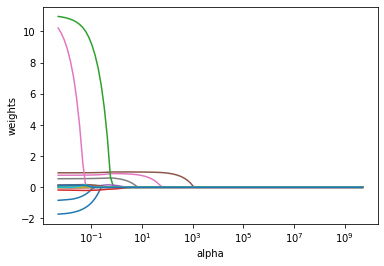

In [53]:
lasso = Lasso(max_iter=10000, fit_intercept=True, random_state=RANDOM_SEED)

coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

In [54]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=10000, fit_intercept=True, random_state=RANDOM_SEED)

In [55]:
lassocv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, random_state=1)

In [56]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

110.51372755944932

In [57]:
pd.Series(lasso.coef_, index=x_cols)

year             -0.000000
month             0.000000
day_of_month      0.000000
day_of_week      -0.000000
crs_dep_time      0.002309
dep_delay         0.984043
taxi_out          0.875029
taxi_in           0.552001
crs_arr_time     -0.001798
distance         -0.004073
origin_ca        -0.000000
is_weekday        0.000000
external_cause    0.000000
TMAX             -0.086082
TMIN              0.102021
TAVG              0.000000
PRCP              0.000000
AWND              0.000000
WSF2              0.012531
WT01              0.000000
WT08              0.000000
dtype: float64